***

<font color='red'><h1><center>Symbiosis Centre for Information Technology</center></h1>
<h1><center><I>(A Constituent of the Symbiosis International University, Pune)<I></center></h1></font>

***
<h2><center>Machine Learning - Wine Tasting Assignment 1</center></h2>

Name 		: Tanvi Senjaliya<br>
PRN 		: 21030242060<br>
Batch		: 2021-23	
Date		: 30/09/2021



In [1]:
# 2. Import libraries and modules
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
import joblib 
import plotly.graph_objects as go

## PART I : Data Preparation

In [2]:
# 3. Load red wine data.
data = pd.read_csv("winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
print("Shape : ", data.shape)

Shape :  (1599, 12)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.isnull().sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No need of data cleaning as there are no null values

## PART II : Exploratory Data Analysis

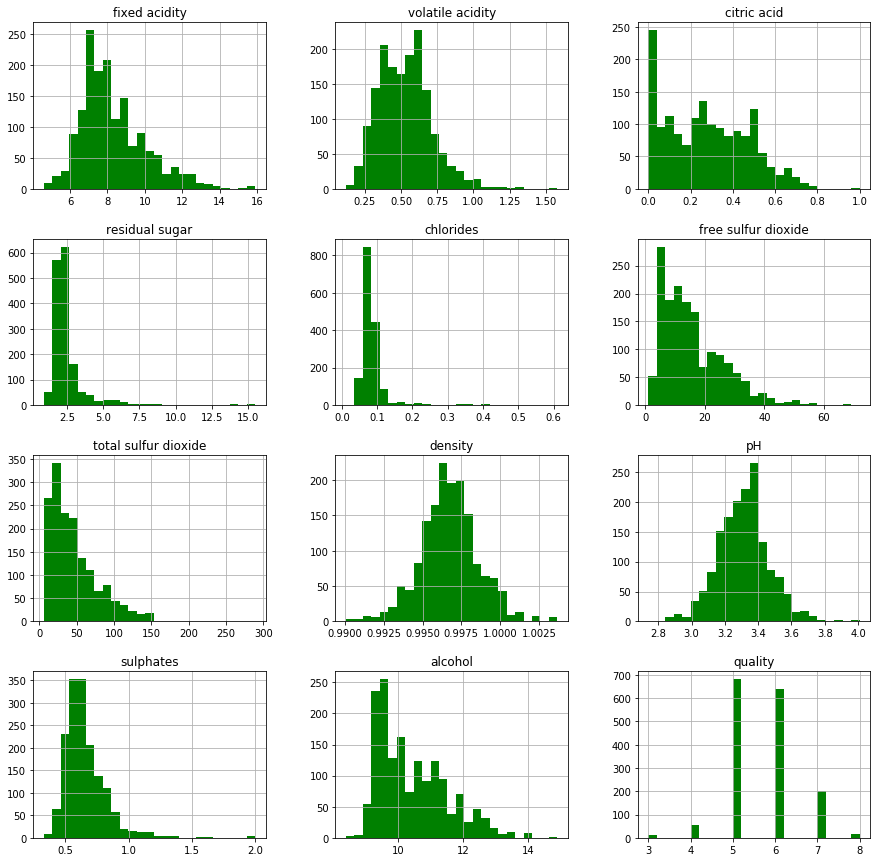

In [7]:
data.hist(bins=25, figsize=(15,15),color='green')
plt.show()

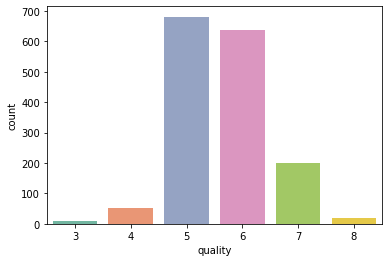

In [8]:
sns.countplot(x='quality',data=data,palette="Set2")
plt.show()

In [9]:
corr_matrix =data.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Here as we can see the quality of red wine is in range from 3 to 8 so we will convert it into two categories.

Say 3-5 will be Bad Red Wine and 6-8 will be Good Red Wine.

([<matplotlib.patches.Wedge at 0x2058360ca08>,
 [Text(0.1197087778563009, 1.093466875814787, 'Good Red Wine'),
  Text(-0.11970867547854278, -1.0934668870227269, 'Bad Red Wine')],
 [Text(0.06529569701252776, 0.5964364777171565, '46.53%'),
  Text(-0.06529564117011423, -0.5964364838305782, '53.47%')])

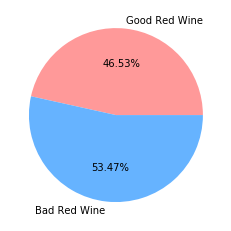

In [10]:
data.quality = data.quality.replace({6:1,7:1,8:1, 3:0,4:0,5:0})
plt.pie(x = data.groupby(['quality']).quality.count(),
        labels = ['Good Red Wine','Bad Red Wine'], autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])


## PART III : Spliting data set into training and test dataset

In [11]:
# 4. Split data into training and test sets
y = data.quality
X = data.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=101, 
                                                    stratify=y)


## PART IV : Training Model 

#### Decision Tree Classifier

In [12]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
Y_predict = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
dtcaccuracy = round(score*100,2)
print('accuracy_score percent :', dtcaccuracy)
print("Mean squared error: ",mean_squared_error(y_test,Y_predict))

accuracy_score percent : 73.5
Mean squared error:  0.265


#### Random Forest Classifier

In [13]:
rf = RandomForestClassifier(n_estimators =90, random_state = 200)
rf.fit(X_train, y_train)
rf_predictions=rf.predict(X_test)
rfaccuracy= np.mean(rf.predict(X_test) == y_test)*100
print('Accuracy',rfaccuracy)
print("Mean squared error: ",mean_squared_error(y_test,rf_predictions))

Accuracy 82.5
Mean squared error:  0.175


In [14]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       186
           1       0.84      0.84      0.84       214

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



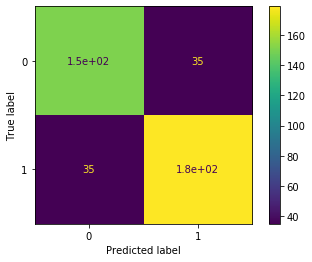

In [15]:
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

#### Random Forest

In [16]:
# Hyperparameter Optimization
# 5. Declare data preprocessing steps
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

# 6. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}
 
# 7. Tune model using cross-validation pipeline
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
clf.fit(X_train, y_train)
# 8. Refit on the entire training set
# No additional code needed if clf.refit == True (default is True)
# 9. Evaluate model pipeline on test data
pred = clf.predict(X_test)
score= r2_score(y_test, pred)
rfcaccuracy = round(score*100,2)
print('accuracy_score percent :',rfcaccuracy )

print("Mean squared error: ",mean_squared_error(y_test,pred))

accuracy_score percent : 43.78
Mean squared error:  0.13986775


## PART VII : Choosing a model

In [17]:
print("Accuracy Scores:")
print("Decision Tree Classifier: ",dtcaccuracy)
print("Random Forest Classifier: ",rfaccuracy)
print("Random Forest Regressor:  ",rfcaccuracy)


Accuracy Scores:
Decision Tree Classifier:  73.5
Random Forest Classifier:  82.5
Random Forest Regressor:   43.78


## PART VIII : Saving the Model for future use

In [18]:
# 10. Save model for future use
joblib.dump(clf, 'rf_regressor.pkl')
# To load: clf2 = joblib.load('rf_regressor.pkl')


['rf_regressor.pkl']

***